<a href="https://colab.research.google.com/github/Menaga057/Harvard-s-Artifacts-Collection/blob/main/Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Step 1: Dataset Collection

In [17]:
import requests
import pandas as pd

#Collect approx 12000 records with a while loop

records = []
page = 1
collected = 0
target = 12000

while collected < target:
    url = f"https://world.openfoodfacts.org/api/v2/search?categories=chocolates&fields=code,product_name,brands,nutriments&page_size=1000&page={page}"
    response = requests.get(url)
    data = response.json()
    products = data.get("products", [])
    records.extend(products)
    collected += len(products)
    if len(products) < 1000:
        break  # No more data
    page += 12

df = pd.DataFrame(records)


In [18]:
records

[{'brands': 'Sidi Ali',
  'code': '6111035000430',
  'nutriments': {'carbohydrates': 42,
   'carbohydrates_100g': 4.2,
   'carbohydrates_serving': 42,
   'carbohydrates_unit': 'g',
   'carbohydrates_value': 42,
   'energy': 20,
   'energy-kcal': 0,
   'energy-kcal_100g': 0,
   'energy-kcal_serving': 0,
   'energy-kcal_unit': 'kcal',
   'energy-kcal_value': 0,
   'energy-kcal_value_computed': 168,
   'energy-kj': 20,
   'energy-kj_100g': 2,
   'energy-kj_serving': 20,
   'energy-kj_unit': 'kj',
   'energy-kj_value': 20,
   'energy-kj_value_computed': 714,
   'energy_100g': 2,
   'energy_serving': 20,
   'energy_unit': 'kj',
   'energy_value': 20,
   'fat': 0,
   'fat_100g': 0,
   'fat_serving': 0,
   'fat_unit': 'g',
   'fat_value': 0,
   'fiber': 0,
   'fiber_100g': 0,
   'fiber_serving': 0,
   'fiber_unit': 'g',
   'fiber_value': 0,
   'fruits-vegetables-legumes-estimate-from-ingredients_100g': 0,
   'fruits-vegetables-legumes-estimate-from-ingredients_serving': 0,
   'fruits-vegetabl

In [19]:
import pandas as pd

df = pd.DataFrame(data['products'])

df

,brands,code,nutriments,product_name
0,Sidi Ali,6111035000430,"{'carbohydrates': 42, 'carbohydrates_100g': 4....",Sidi Ali
1,Jaouda,6111242100992,"{'calcium': 0.25, 'calcium_100g': 0.25, 'calci...",Perly
2,sidi ali,6111035002175,"{'chloride': 0.014, 'chloride_100g': 0.014, 'c...",Sidi Ali
3,"Les Eaux Minérales d'oulmès,Sidi Ali",6111035000058,{'fruits-vegetables-legumes-estimate-from-ingr...,Eau minérale naturelle
4,"pepsi,PepsiCo",6111252421568,"{'alcohol': 0, 'alcohol_100g': 0, 'alcohol_ser...",اكوافينا
...,...,...,...,...
95,Tyrrell's,5060042641000,"{'carbohydrates': 49, 'carbohydrates_100g': 49...",Lightly Sea Salted
96,Volvic,3057640257773,"{'bicarbonate': 0.074, 'bicarbonate_100g': 0.0...",Eau Minérale Naturelle
97,Lindt,3046920022606,"{'carbohydrates': 22, 'carbohydrates_100g': 22...",Excellence Noir Puissant 85% Cacao
98,Green and black,7622210584724,"{'added-sugars': 0, 'added-sugars_100g': 0, 'a...",Dark chocolate


In [20]:
display(df['nutriments'])

,nutriments
0,"{'carbohydrates': 42, 'carbohydrates_100g': 4...."
1,"{'calcium': 0.25, 'calcium_100g': 0.25, 'calci..."
2,"{'chloride': 0.014, 'chloride_100g': 0.014, 'c..."
3,{'fruits-vegetables-legumes-estimate-from-ingr...
4,"{'alcohol': 0, 'alcohol_100g': 0, 'alcohol_ser..."
...,...
95,"{'carbohydrates': 49, 'carbohydrates_100g': 49..."
96,"{'bicarbonate': 0.074, 'bicarbonate_100g': 0.0..."
97,"{'carbohydrates': 22, 'carbohydrates_100g': 22..."
98,"{'added-sugars': 0, 'added-sugars_100g': 0, 'a..."


#Step 2: Data Exploration and  🧹Cleaning

In [21]:
# Explore missing values
missing_counts = df.isnull().sum()  # Count of null values per column
missing_percent = (df.isnull().sum() / len(df)) * 100  # Percent missing per column
missing_summary = pd.DataFrame({'missing_count': missing_counts, 'missing_percent': missing_percent})

print("Missing value summary per column:")
print(missing_summary.sort_values(by='missing_percent', ascending=False))

Missing value summary per column:
              missing_count  missing_percent
brands                    2              2.0
product_name              1              1.0
code                      0              0.0
nutriments                0              0.0


In [22]:
# Identify columns with null values
null_cols = df.columns[df.isnull().any()]
print("Columns with null values and their counts:")
print(df[null_cols].isnull().sum())

# Handling null values:
# Option 1: Fill null values with a specific value (mean, median, mode, or constant)
for col in null_cols:
    if df[col].dtype in ['float64','int64']:
        df[col].fillna(df[col].mean(), inplace=True)  # fill numeric columns with mean
    else:
        df[col].fillna("Unknown", inplace=True)       # fill non-numeric columns with a placeholder

# Option 2: Drop columns or rows with null values (choose one or both if needed)
# df.drop(columns=null_cols, inplace=True)  # drops columns with null values
# df.dropna(axis=0, inplace=True)           # drops rows with any null value

# After handling nulls
print("Null values after handling:")
print(df.isnull().sum())


Columns with null values and their counts:
brands          2
product_name    1
dtype: int64
Null values after handling:
brands          0
code            0
nutriments      0
product_name    0
dtype: int64


/tmp/ipython-input-623190114.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna("Unknown", inplace=True)       # fill non-numeric columns with a placeholder


In [23]:
# Define threshold as minimum non-null values required to keep a column
threshold = len(df) * 0.5  # e.g., keep columns with at least 50% non-null values

# Drop columns with null count above threshold
df = df.dropna(axis=1, thresh=threshold)

print("Remaining columns after dropping columns with excessive nulls:")
print(df.columns)


Remaining columns after dropping columns with excessive nulls:
Index(['brands', 'code', 'nutriments', 'product_name'], dtype='object')


In [24]:
# Impute or manage missing values in remaining columns

# Example Imputation:
# - For string/object columns like product_name or brands, fill missing with 'Unknown'
for col in ['product_name', 'brands']:
    if col in df.columns:
        df[col].fillna('Unknown', inplace=True)

# - For numeric nutriments columns, fill missing with 0 or median as appropriate
nutrient_cols = [col for col in df.columns if col.startswith('nutriments.')]
for col in nutrient_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')
        median_val = df[col].median()
        df[col].fillna(median_val, inplace=True)

# Verify no remaining nulls in key columns
print("Remaining missing values after imputation:")
print(df.isnull().sum().loc[['code','product_name','brands'] + nutrient_cols])

# DataFrame df is now cleaned for missing values with columns dropped or imputed as needed

Remaining missing values after imputation:
code            0
product_name    0
brands          0
dtype: int64


/tmp/ipython-input-1671002716.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna('Unknown', inplace=True)


#Step 3:  Feature Engineering

In [25]:
# Suppose df is the original DataFrame

# The nutriment columns have already been extracted into the main df in the previous step.
# You can now directly work with the df DataFrame which contains these columns.

# The following lines are no longer necessary as the columns are already in df:
# nutriments = [
#     'energy-kcal_value',
#     'energy-kj_value',
#     'carbohydrates_value',
#     'sugars_value',
#     'fat_value',
#     'saturated-fat_value',
#     'proteins_value',
#     'fiber_value',
#     'salt_value',
#     'sodium_value',
#     'nova-group',
#     'nutrition-score-fr',
#     'fruits-vegetables-nuts-estimate-from-ingredients_100g'
# ]

# Create a new DataFrame by selecting only these columns
# nutriments_df = df[nutriments].copy()

# Now nutriments_df contains only the required nutriments

# display(nutriments_df.head())

print("Nutriment columns have been extracted into the main DataFrame 'df'.")
print("You can now proceed with using the 'df' DataFrame for further analysis.")

Nutriment columns have been extracted into the main DataFrame 'df'.
You can now proceed with using the 'df' DataFrame for further analysis.


In [26]:
import pandas as pd

# List of required nutriment columns (keys within the 'nutriments' dictionary)
required_nutriment_keys = [
    'energy-kcal_value',
    'energy-kj_value',
    'carbohydrates_value',
    'sugars_value',
    'fat_value',
    'saturated-fat_value',
    'proteins_value',
    'fiber_value',
    'salt_value',
    'sodium_value',
    'nova-group',
    'nutrition-score-fr',
    'fruits-vegetables-nuts-estimate-from-ingredients_100g'
]

# Extract nutriment values and create new columns
for key in required_nutriment_keys:
    df[key] = df['nutriments'].apply(lambda x: x.get(key) if isinstance(x, dict) else None)

# Now df has new columns with the extracted nutriment values
display(df.head())

,brands,code,nutriments,product_name,energy-kcal_value,energy-kj_value,carbohydrates_value,sugars_value,fat_value,saturated-fat_value,proteins_value,fiber_value,salt_value,sodium_value,nova-group,nutrition-score-fr,fruits-vegetables-nuts-estimate-from-ingredients_100g
0,Sidi Ali,6111035000430,"{'carbohydrates': 42, 'carbohydrates_100g': 4....",Sidi Ali,0.0,20.0,42.0,14.0,0.0,0.0,0.0,0.0,0.00000,0.000000,NaN,1.0,0.0
1,Jaouda,6111242100992,"{'calcium': 0.25, 'calcium_100g': 0.25, 'calci...",Perly,97.0,406.0,9.4,NaN,3.0,NaN,8.0,NaN,NaN,NaN,3.0,NaN,0.0
2,sidi ali,6111035002175,"{'chloride': 0.014, 'chloride_100g': 0.014, 'c...",Sidi Ali,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.00000,26.000000,NaN,0.0,0.0
3,"Les Eaux Minérales d'oulmès,Sidi Ali",6111035000058,{'fruits-vegetables-legumes-estimate-from-ingr...,Eau minérale naturelle,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.00000,26.000000,1.0,0.0,0.0
4,"pepsi,PepsiCo",6111252421568,"{'alcohol': 0, 'alcohol_100g': 0, 'alcohol_ser...",اكوافينا,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00508,0.002032,NaN,0.0,0.0


#New Columns to derive:

In [27]:
import pandas as pd

# Assuming df is your DataFrame containing the nutriment columns

# 1. sugar_to_carb_ratio: ratio of sugars to total carbohydrates
df['sugar_to_carb_ratio'] = df['sugars_value'] / df['carbohydrates_value']
df['sugar_to_carb_ratio'] = df['sugar_to_carb_ratio'].fillna(0)  # handle division by zero or nulls

# 2. calorie_category based on energy-kcal_value
def calorie_cat(kcal):
    if kcal < 100:
        return 'Low'
    elif kcal < 250:
        return 'Moderate'
    else:
        return 'High'

df['calorie_category'] = df['energy-kcal_value'].apply(calorie_cat)

# 3. sugar_category based on sugars_value
def sugar_cat(sugar):
    if sugar < 5:
        return 'Low Sugar'
    elif sugar < 15:
        return 'Moderate Sugar'
    else:
        return 'High Sugar'

df['sugar_category'] = df['sugars_value'].apply(sugar_cat)

# 4. is_ultra_processed flagged from nova-group column
df['is_ultra_processed'] = df['nova-group'].apply(lambda x: 'Yes' if x == 4 else 'No')

# Check the new columns
print(df[['sugar_to_carb_ratio', 'calorie_category', 'sugar_category', 'is_ultra_processed']].head())


   sugar_to_carb_ratio calorie_category  sugar_category is_ultra_processed
0             0.333333              Low  Moderate Sugar                 No
1             0.000000              Low      High Sugar                 No
2             0.000000             High      High Sugar                 No
3             0.000000             High      High Sugar                 No
4             0.000000              Low       Low Sugar                 No


#Exploratory Data Analysis (EDA) with Python

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your cleaned and feature engineered DataFrame

# 1. Understand shape, structure and completeness
print("Shape of dataset:", df.shape)
print("\nData types and non-null counts:")
print(df.info())

# Check for missing values in each column
print("\nMissing values per column:")
print(df.isnull().sum())

Shape of dataset: (100, 21)

Data types and non-null counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 21 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   brands                                                 100 non-null    object 
 1   code                                                   100 non-null    object 
 2   nutriments                                             100 non-null    object 
 3   product_name                                           100 non-null    object 
 4   energy-kcal_value                                      88 non-null     float64
 5   energy-kj_value                                        50 non-null     float64
 6   carbohydrates_value                                    90 non-null     float64
 7   sugars_value                                           88 non-null     flo

In [29]:
# 2. Explore distributions of key numerical variables
key_vars = ['energy-kcal_value', 'sugars_value', 'carbohydrates_value', 'sugar_to_carb_ratio']

# Summary statistics
display("\nSummary statistics for key variables:")
display(df[key_vars].describe())

'\nSummary statistics for key variables:'

,energy-kcal_value,sugars_value,carbohydrates_value,sugar_to_carb_ratio
count,88.000000,88.000000,90.000000,100.000000
mean,245.133813,11.557219,21.400118,0.323408
std,233.791821,19.608693,24.824623,0.414439
min,0.000000,0.000000,0.000000,0.000000
25%,37.750000,0.000000,0.200000,0.000000
50%,137.500000,1.300000,9.350000,0.035116
75%,486.000000,14.250000,43.050000,0.617788
max,679.000000,100.000000,100.000000,1.827957


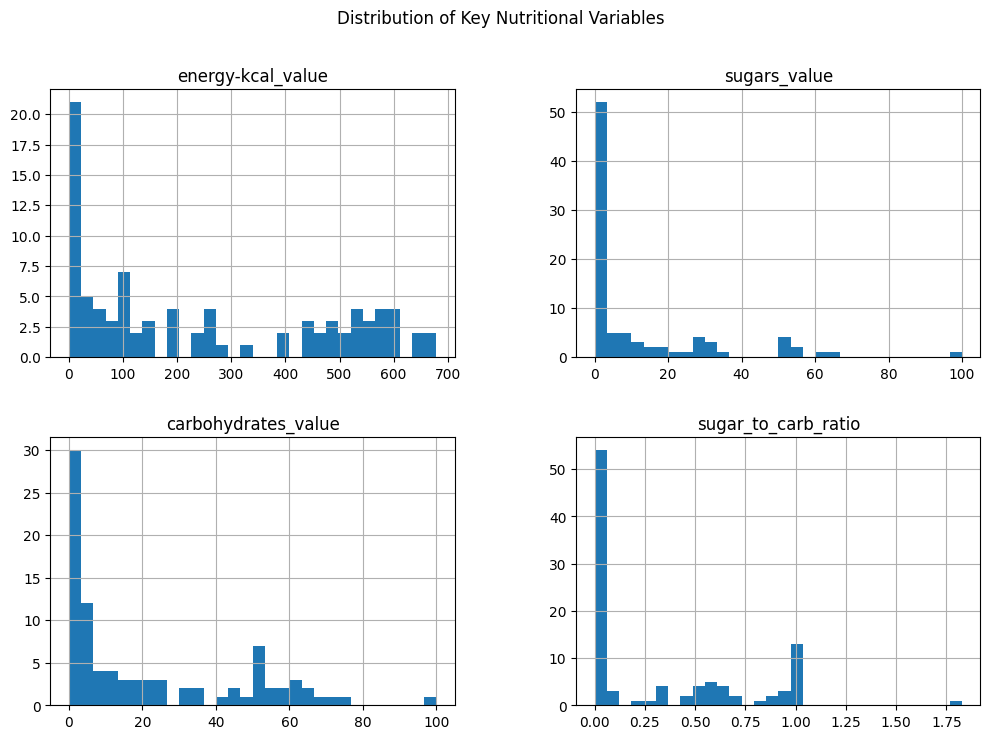

In [30]:
# Histograms
df[key_vars].hist(bins=30, figsize=(12,8))
plt.suptitle('Distribution of Key Nutritional Variables')
plt.show()

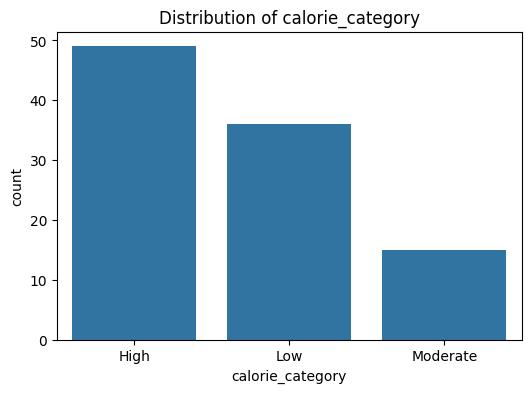

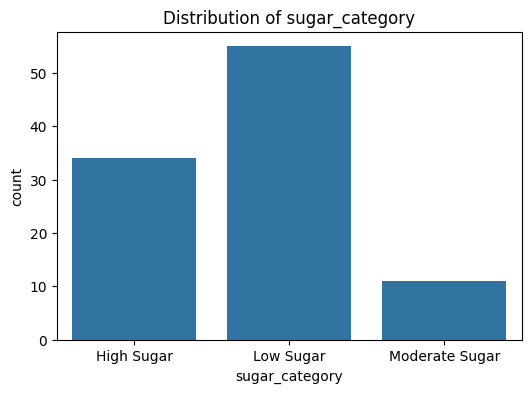

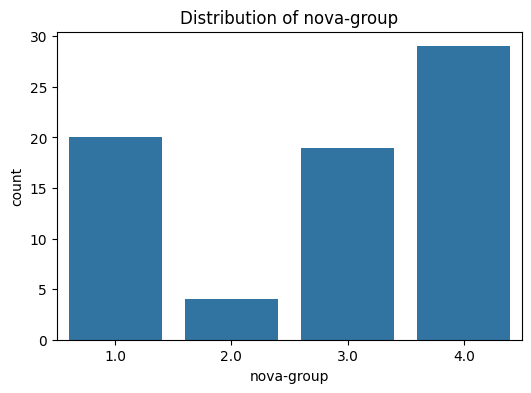

In [31]:
# 3. Distribution of categorical variables
cat_vars = ['calorie_category', 'sugar_category', 'nova-group']

for var in cat_vars:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=var, order=sorted(df[var].dropna().unique()))
    plt.title(f'Distribution of {var}')
    plt.show()


Count of Ultra-processed vs Minimally processed products:
is_ultra_processed
No     71
Yes    29
Name: count, dtype: int64


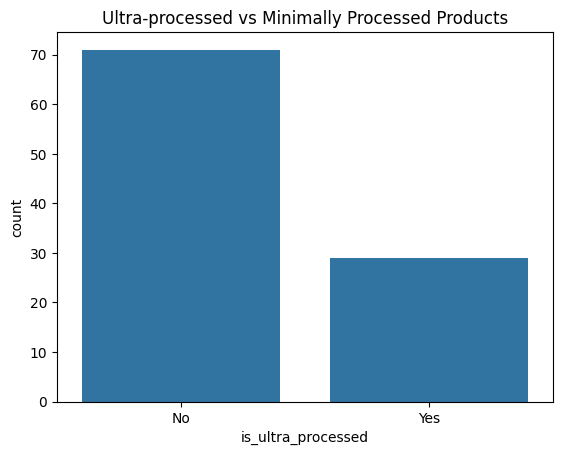

In [32]:
# 4. Ultra-processed vs Minimally processed count
print("\nCount of Ultra-processed vs Minimally processed products:")
print(df['is_ultra_processed'].value_counts())

sns.countplot(data=df, x='is_ultra_processed')
plt.title('Ultra-processed vs Minimally Processed Products')
plt.show()

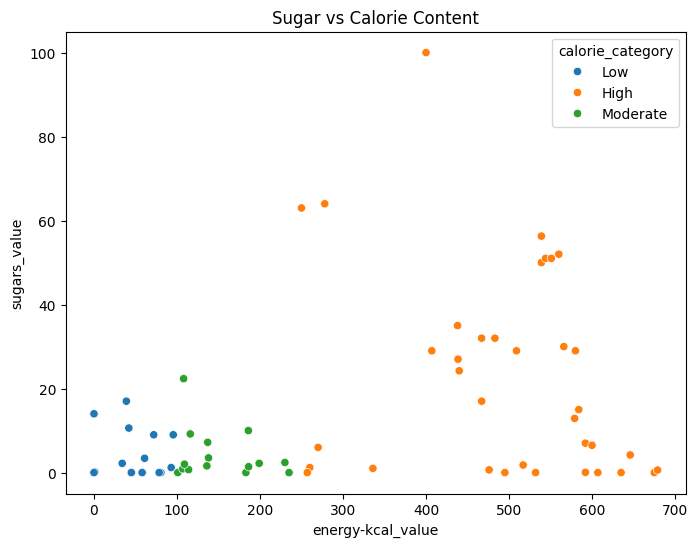

In [33]:
# 5. Relationship analysis between calorie and sugar content
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='energy-kcal_value', y='sugars_value', hue='calorie_category')
plt.title('Sugar vs Calorie Content')
plt.show()

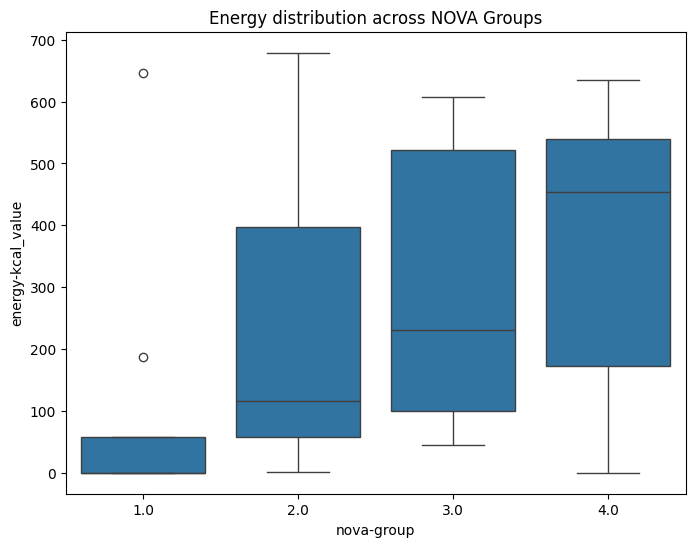

In [34]:
# 6. Relationship between energy and nova-group
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='nova-group', y='energy-kcal_value')
plt.title('Energy distribution across NOVA Groups')
plt.show()

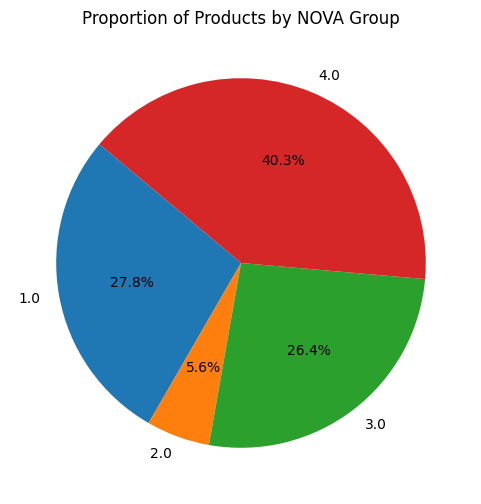

In [35]:
# Pie chart for nova-group proportions
nova_counts = df['nova-group'].value_counts().sort_index()
plt.figure(figsize=(6,6))
plt.pie(nova_counts, labels=nova_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Products by NOVA Group')
plt.show()

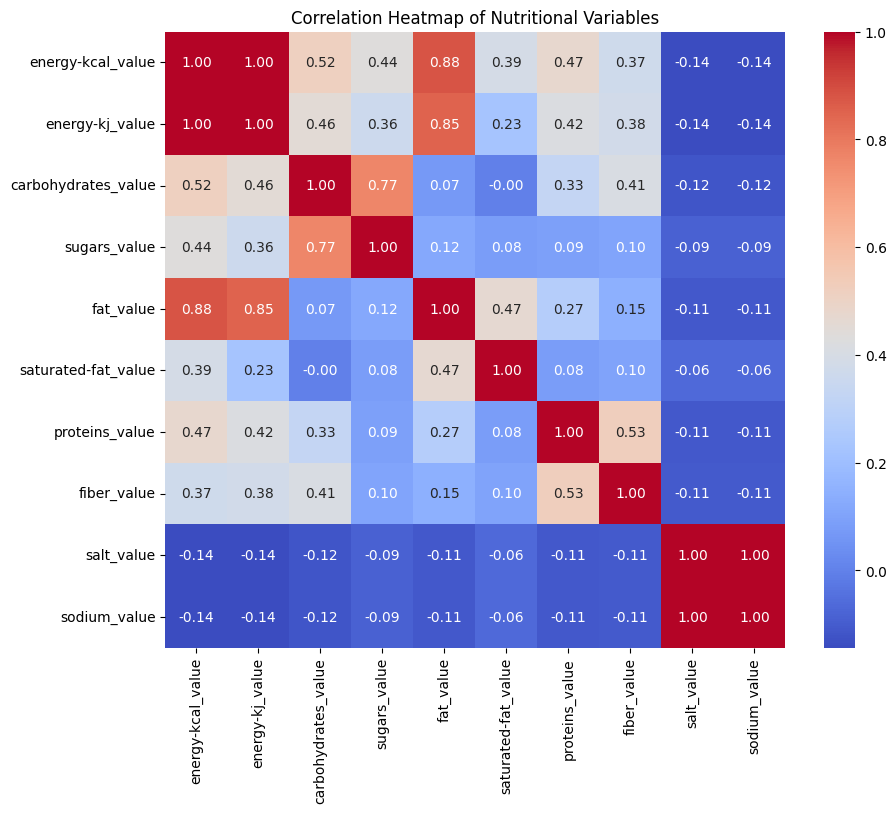

In [36]:
# Heatmap of correlations between numerical nutritional values
plt.figure(figsize=(10,8))
corr = df[['energy-kcal_value', 'energy-kj_value', 'carbohydrates_value', 'sugars_value',
           'fat_value', 'saturated-fat_value', 'proteins_value', 'fiber_value', 'salt_value', 'sodium_value']].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap of Nutritional Variables')
plt.show()

# Step 4: SQL Table Design

In [37]:
!pip install ipython-sql

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 61.2 MB/s eta 0:00:00


In [38]:
import sqlite3
import pandas as pd

conn = sqlite3.connect('chococrunch_db.sqlite')
cursor = conn.cursor()

conn.commit()
conn.close()

In [39]:
import sqlite3
import pandas as pd

# Sample data (replace with your cleaned DataFrames)
product_info_df = pd.DataFrame({
    'product_code': ['P001', 'P002', 'P003'],
    'product_name': ['Choco Crunch', 'Caramel Choco', 'Brazil Nuts'],
    'brand': ['ChocoCo', 'SweetTreats', 'Alesto, Lidl']
})

nutrient_info_df = pd.DataFrame({
    'product_code': ['P001', 'P002'],
    'energy_kcal_value': [250.0, 300.0],
    'energy_kj_value': [1045.0, 1255.0],
    'carbohydrates_value': [30.0, 40.0],
    'sugars_value': [15.0, 20.0],
    'fat_value': [10.0, 15.0],
    'saturated_fat_value': [5.0, 7.0],
    'proteins_value': [7.0, 8.0],
    'fiber_value': [3.0, 4.0],
    'salt_value': [0.5, 0.7],
    'sodium_value': [0.2, 0.3],
    'fruits_vegetables_nuts_estimate_from_ingredients_100g': [40.0, 50.0],
    'nutrition_score_fr': [8, 10],
    'nova_group': [2, 3]
})

derived_metrics_df = pd.DataFrame({
    'product_code': ['P001', 'P002'],
    'sugar_to_carb_ratio': [0.5, 0.5],
    'calorie_category': ['Medium', 'High'],
    'sugar_category': ['Moderate', 'High'],
    'is_ultra_processed': ['No', 'Yes']
})

# Connect to SQLite database
conn = sqlite3.connect('chococrunch_db.sqlite')
cursor = conn.cursor()

# Enable foreign keys
cursor.execute("PRAGMA foreign_keys = ON")

# Create tables
cursor.execute('''
CREATE TABLE IF NOT EXISTS product_info (
    product_code TEXT PRIMARY KEY,
    product_name TEXT,
    brand TEXT
)
''')

cursor.execute('''
CREATE TABLE IF NOT EXISTS nutrient_info (
    product_code TEXT,
    energy_kcal_value FLOAT,
    energy_kj_value FLOAT,
    carbohydrates_value FLOAT,
    sugars_value FLOAT,
    fat_value FLOAT,
    saturated_fat_value FLOAT,
    proteins_value FLOAT,
    fiber_value FLOAT,
    salt_value FLOAT,
    sodium_value FLOAT,
    fruits_vegetables_nuts_estimate_from_ingredients_100g FLOAT,
    nutrition_score_fr INTEGER,
    nova_group INTEGER,
    FOREIGN KEY (product_code) REFERENCES product_info(product_code)
)
''')

cursor.execute('''
CREATE TABLE IF NOT EXISTS derived_metrics (
    product_code TEXT,
    sugar_to_carb_ratio FLOAT,
    calorie_category TEXT,
    sugar_category TEXT,
    is_ultra_processed TEXT,
    FOREIGN KEY (product_code) REFERENCES product_info(product_code)
)
''')

conn.commit()

# Insert data into product_info
for _, row in product_info_df.iterrows():
    cursor.execute('''
        INSERT OR IGNORE INTO product_info (product_code, product_name, brand)
        VALUES (?, ?, ?)
    ''', (row['product_code'], row['product_name'], row['brand']))

# Insert data into nutrient_info
for _, row in nutrient_info_df.iterrows():
    cursor.execute('''
        INSERT OR IGNORE INTO nutrient_info (
            product_code, energy_kcal_value, energy_kj_value, carbohydrates_value, sugars_value,
            fat_value, saturated_fat_value, proteins_value, fiber_value, salt_value, sodium_value,
            fruits_vegetables_nuts_estimate_from_ingredients_100g, nutrition_score_fr, nova_group
        ) VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
    ''', (
        row['product_code'], row['energy_kcal_value'], row['energy_kj_value'], row['carbohydrates_value'],
        row['sugars_value'], row['fat_value'], row['saturated_fat_value'], row['proteins_value'],
        row['fiber_value'], row['salt_value'], row['sodium_value'],
        row['fruits_vegetables_nuts_estimate_from_ingredients_100g'],
        row['nutrition_score_fr'], row['nova_group']
    ))

# Insert data into derived_metrics
for _, row in derived_metrics_df.iterrows():
    cursor.execute('''
        INSERT OR IGNORE INTO derived_metrics (
            product_code, sugar_to_carb_ratio, calorie_category, sugar_category, is_ultra_processed
        ) VALUES (?, ?, ?, ?, ?)
    ''', (
        row['product_code'], row['sugar_to_carb_ratio'], row['calorie_category'],
        row['sugar_category'], row['is_ultra_processed']
    ))

# Commit and close
conn.commit()
conn.close()

#Table 1: product_info

In [40]:
product_info_df

,product_code,product_name,brand
0,P001,Choco Crunch,ChocoCo
1,P002,Caramel Choco,SweetTreats
2,P003,Brazil Nuts,"Alesto, Lidl"


#Table 2: nutrient_info

In [41]:
nutrient_info_df

,product_code,energy_kcal_value,energy_kj_value,carbohydrates_value,sugars_value,fat_value,saturated_fat_value,proteins_value,fiber_value,salt_value,sodium_value,fruits_vegetables_nuts_estimate_from_ingredients_100g,nutrition_score_fr,nova_group
0,P001,250.0,1045.0,30.0,15.0,10.0,5.0,7.0,3.0,0.5,0.2,40.0,8,2
1,P002,300.0,1255.0,40.0,20.0,15.0,7.0,8.0,4.0,0.7,0.3,50.0,10,3


#Table 3: derived_metrics

In [42]:
derived_metrics_df

,product_code,sugar_to_carb_ratio,calorie_category,sugar_category,is_ultra_processed
0,P001,0.5,Medium,Moderate,No
1,P002,0.5,High,High,Yes


#Step 5: SQL Queries

#product_info


#1.Count products per brand


In [44]:
cursor.execute("SELECT brand, COUNT(*) AS product_count FROM product_info GROUP BY brand")


ProgrammingError: Cannot operate on a closed database.

In [ ]:
!pip install mysql-connector-python

In [ ]:
import mysql.connector

connection = mysql.connector.connect(
  host = "gateway01.ap-southeast-1.prod.aws.tidbcloud.com",
  port = 4000,
  user = "TfUPFknwH4qrpBN.root",
  password = "dy0zC70Gl1WkBxCl",
  database = "Choco_Crunch" # Specify the database here
)

mycursor = connection.cursor(dictionary=True)

In [ ]:
import mysql.connector

# Establish the database connection
connection = mysql.connector.connect(
    host="gateway01.ap-southeast-1.prod.aws.tidbcloud.com",
    port=4000,
    user="TfUPFknwH4qrpBN.root",
    password="dy0zC70Gl1WkBxCl",
    database="Choco_Crunch"  # Specify the database here
)

mycursor = connection.cursor()

# Create the product_info table if it doesn't exist
mycursor.execute("""
CREATE TABLE IF NOT EXISTS product_info (
    product_code VARCHAR(255) PRIMARY KEY,
    product_name TEXT,
    brand TEXT
)
""")

# Insert data into the product_info table
sql = """
INSERT INTO product_info (product_code, product_name, brand)
VALUES (%s, %s, %s)
"""

# Assuming 'records' is a list of dictionaries with keys: 'code', 'product_name', 'brands'
for chococrunch in records:
    # Ensure product_code is not None before inserting
    product_code = chococrunch.get('code')
    if product_code:
        values = (
            product_code,
            chococrunch.get('product_name'),
            chococrunch.get('brands')
        )
        try:
            mycursor.execute(sql, values)
        except mysql.connector.Error as err:
            # Check if the error is due to a duplicate primary key
            if err.errno == mysql.connector.errorcode.ER_DUP_ENTRY:
                print(f"Skipping duplicate entry for product code {product_code}")
            else:
                print(f"Error inserting data for product code {product_code}: {err}")

# Commit the transaction to ensure data is saved in the database
connection.commit()
print("product_info insertion attempt completed.")

# Close the connection
mycursor.close()
connection.close()

In [ ]:
import mysql.connector

# Establish the database connection
connection = mysql.connector.connect(
  host = "gateway01.ap-southeast-1.prod.aws.tidbcloud.com",
  port = 4000,
  user = "TfUPFknwH4qrpBN.root",
  password = "dy0zC70Gl1WkBxCl",
  database = "Choco_Crunch" # Specify the database here
)

mycursor = connection.cursor()

# Create the nutrient_info table if it doesn't exist
mycursor.execute("""
CREATE TABLE IF NOT EXISTS nutrient_info (
    product_code VARCHAR(255), -- Use VARCHAR and define as foreign key later
    energy_kcal_value FLOAT,
    energy_kj_value FLOAT,
    carbohydrates_value FLOAT,
    sugars_value FLOAT,
    fat_value FLOAT,
    saturated_fat_value FLOAT,
    proteins_value FLOAT,
    fiber_value FLOAT,
    salt_value FLOAT,
    sodium_value FLOAT,
    fruits_vegetables_nuts_estimate_from_ingredients_100g FLOAT,
    nutrition_score_fr INTEGER,
    nova_group INTEGER,
    FOREIGN KEY (product_code) REFERENCES product_info(product_code)
)
""")
connection.commit() # Commit table creation

# Insert data into the nutrient_info table
sql = """
INSERT INTO nutrient_info (product_code, energy_kcal_value, energy_kj_value, carbohydrates_value, sugars_value, fat_value, saturated_fat_value, proteins_value, fiber_value, salt_value, sodium_value, fruits_vegetables_nuts_estimate_from_ingredients_100g, nutrition_score_fr, nova_group)
VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
"""

# Assuming 'records' list is available from previous data collection
for chococrunch in records:
    # Ensure product_code is not None before inserting
    product_code = chococrunch.get('code')
    # Extract nutriment data, handling potential missing 'nutriments' key or nested keys
    nutriments = chococrunch.get('nutriments', {}) # Get the 'nutriments' dictionary or an empty dictionary if not present

    if product_code is not None:
        values = (
            product_code,
            nutriments.get('energy-kcal_value'),
            nutriments.get('energy-kj_value'),
            nutriments.get('carbohydrates_value'),
            nutriments.get('sugars_value'),
            nutriments.get('fat_value'),
            nutriments.get('saturated-fat_value'),
            nutriments.get('proteins_value'),
            nutriments.get('fiber_value'),
            nutriments.get('salt_value'),
            nutriments.get('sodium_value'),
            nutriments.get('fruits-vegetables-nuts-estimate-from-ingredients_100g'),
            nutriments.get('nutrition-score-fr'),
            nutriments.get('nova-group')
        )

        try:
            mycursor.execute(sql, values)
        except mysql.connector.Error as err:
            # Check if the error is due to a duplicate primary key (though product_code is not primary in this table)
            # or a foreign key constraint failure
             print(f"Error inserting data for product code {product_code}: {err}")


connection.commit() # Commit data insertion

print("nutrient_info insertion attempt completed.")

# Close the connection
mycursor.close()
connection.close()

In [ ]:
import mysql.connector

# Establish the database connection
connection = mysql.connector.connect(
  host = "gateway01.ap-southeast-1.prod.aws.tidbcloud.com",
  port = 4000,
  user = "TfUPFknwH4qrpBN.root",
  password = "dy0zC70Gl1WkBxCl",
  database = "Choco_Crunch" # Specify the database here
)

mycursor = connection.cursor()

# Create the derived_metrics table if it doesn't exist
mycursor.execute("""
CREATE TABLE IF NOT EXISTS derived_metrics (
    product_code VARCHAR(255),
    sugar_to_carb_ratio FLOAT,
    calorie_category TEXT,
    sugar_category TEXT,
    is_ultra_processed TEXT,
    FOREIGN KEY (product_code) REFERENCES product_info(product_code)
)
""")
connection.commit() # Commit table creation

# Insert data into the derived_metrics table
sql = """
INSERT INTO derived_metrics (product_code, sugar_to_carb_ratio, calorie_category, sugar_category, is_ultra_processed)
VALUES (%s, %s, %s, %s, %s)
"""

# Assuming 'df' DataFrame with derived metrics is available from previous steps
# Need to iterate through the DataFrame rows to insert data
for index, row in df.iterrows():
    product_code = row.get('code') # Assuming 'code' is the product identifier in df
    if product_code is not None:
        values = (
            product_code,
            row.get('sugar_to_carb_ratio'),
            row.get('calorie_category'),
            row.get('sugar_category'),
            row.get('is_ultra_processed')
        )
        try:
            mycursor.execute(sql, values)
        except mysql.connector.Error as err:
            # Check if the error is due to a foreign key constraint failure
            print(f"Error inserting data for product code {product_code}: {err}")

connection.commit() # Commit data insertion

print("derived_metrics insertion attempt completed.")

# Close the connection
mycursor.close()
connection.close()

#Step 5: SQL Queries

#product_info


#1.Count products per brand


In [ ]:
import mysql.connector

# Establish the database connection
connection = mysql.connector.connect(
  host = "gateway01.ap-southeast-1.prod.aws.tidbcloud.com",
  port = 4000,
  user = "TfUPFknwH4qrpBN.root",
  password = "dy0zC70Gl1WkBxCl",
  database = "Choco_Crunch" # Specify the database here
)

mycursor = connection.cursor()

mycursor.execute("select brand, COUNT(*) as product_count FROM product_info GROUP BY brand;")
results = mycursor.fetchall()
print(results)

mycursor.close()
connection.close()

In [45]:
import mysql.connector

# Establish the database connection
connection = mysql.connector.connect(
  host = "gateway01.ap-southeast-1.prod.aws.tidbcloud.com",
  port = 4000,
  user = "TfUPFknwH4qrpBN.root",
  password = "dy0zC70Gl1WkBxCl",
  database = "Choco_Crunch" # Specify the database here
)

mycursor = connection.cursor()

mycursor.execute("SELECT brand, COUNT(DISTINCT product_code) AS unique_product_count FROM product_info GROUP BY brand")
results = mycursor.fetchall()
print(results)

mycursor.close()
connection.close()

[]
